In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import (
    PowerTransformer,
    OneHotEncoder,
    StandardScaler
)
from sklearn.ensemble import IsolationForest

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display, HTML
import vizpro

In [16]:
df = pd.read_csv("C:\\Users\\Santosh Kumar_TSI\\Submission data project\\submission_details.csv")


In [19]:
df.dos= pd.to_datetime(df.dos,format="mixed")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        290 non-null    object        
 1   contact_no  290 non-null    int64         
 2   email_id    290 non-null    object        
 3   title       290 non-null    object        
 4   visa        289 non-null    object        
 5   location    290 non-null    object        
 6   state       290 non-null    object        
 7   linkedin    256 non-null    object        
 8   dos         290 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 20.5+ KB


In [68]:
df.dtypes

name                  object
contact_no             int64
email_id              object
title                 object
visa                  object
location              object
state                 object
linkedin              object
dos           datetime64[ns]
dtype: object

In [72]:
df[df.duplicated()]

,name,contact_no,email_id,title,visa,location,state,linkedin,dos


In [76]:
vizpro.missing_info(df)

,column,count,percentage
0,linkedin,34,11.724138
1,visa,1,0.344828


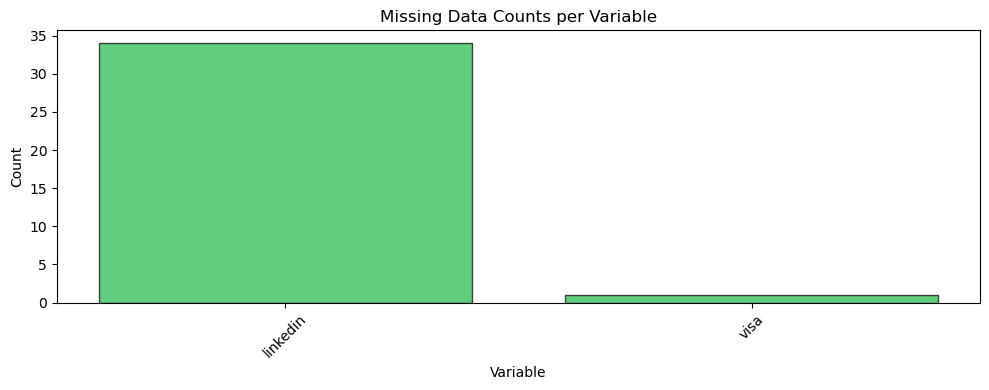

In [78]:
vizpro.plot_missing_info(df)

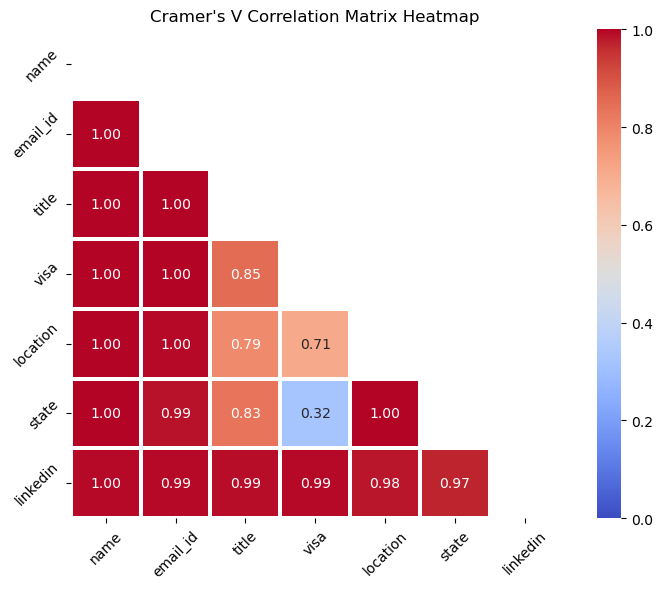

In [38]:
vizpro.cramers_heatmap(df)

In [86]:
vizpro.cat_summary(df,"name")

0      santhosh kumar thiagarajan
1                     blaise sama
2              sanjay kumar kalal
3           sanjay kumar hadavala
4        mitali shashikant shinde
                  ...            
285           rajyalakshmi nukala
286        jagjeet singh chandhok
287                   tanuj goyal
288                 sumeet narang
289                  sheldon reid
Name: name, Length: 290, dtype: object


Datatype:       object
Cardinality:    283
Missing data:   0 rows (0.00%)
Available data: 290 / 290


,
count,290
unique,283
top,maheswaran kolanda swamy
freq,3


,count,percentage
category,,
maheswaran kolanda swamy,3,1.034483
naga vamshi bhargava reddy,2,0.689655
bhanu prathap reddy nallapa reddy,2,0.689655
kobina vandyck,2,0.689655
bharath sangasani,2,0.689655
saiarjun ramarapu,2,0.689655
pooja biswal,1,0.344828
mothi venkata manoj samadi,1,0.344828
rishika rakasi,1,0.344828


In [90]:
vizpro.cat_summary(df,"state")

0        pennsylvania
1               texas
2               texas
3            virginia
4            virginia
            ...      
285             texas
286             texas
287           arizona
288          illinois
289    north carolina
Name: state, Length: 290, dtype: object


Datatype:       object
Cardinality:    29
Missing data:   0 rows (0.00%)
Available data: 290 / 290


,
count,290
unique,29
top,arizona
freq,61


,count,percentage
category,,
arizona,61,21.034483
texas,51,17.586207
new jersey,45,15.517241
california,27,9.310345
georgia,19,6.551724
illinois,10,3.448276
michigan,9,3.103448
pennsylvania,8,2.758621
virginia,8,2.758621


In [92]:
vizpro.cat_summary(df,"location")

0            paoli
1           dallas
2           frisco
3          ashburn
4          ashburn
          ...     
285        houston
286         dallas
287        phoenix
288    warrenville
289      charlotte
Name: location, Length: 290, dtype: object


Datatype:       object
Cardinality:    151
Missing data:   0 rows (0.00%)
Available data: 290 / 290


,
count,290
unique,151
top,phoenix
freq,33


,count,percentage
category,,
phoenix,33,11.379310
dallas,15,5.172414
atlanta,13,4.482759
frisco,9,3.103448
jersey city,8,2.758621
edison,8,2.758621
chandler,6,2.068966
scottsdale,5,1.724138
austin,5,1.724138


In [94]:
vizpro.cat_summary(df,"visa")

0         h1b
1         usc
2         h1b
3         usc
4         h1b
        ...  
285       h1b
286       h1b
287    h4-ead
288       h1b
289       NaN
Name: visa, Length: 290, dtype: object


Datatype:       object
Cardinality:    10
Missing data:   1 rows (0.34%)
Available data: 289 / 290


,
count,289
unique,10
top,usc
freq,100


,count,percentage
category,,
usc,100,34.482759
h1b,91,31.379310
gc,52,17.931034
opt,12,4.137931
tn,12,4.137931
h4-ead,10,3.448276
gc-ead,7,2.413793
l2,3,1.034483
cpt,1,0.344828


In [96]:
vizpro.cat_summary(df,"title")

0                  technical project manager
1                          platform engineer
2                             sas programmer
3                          portfolio manager
4                          portfolio manager
                       ...                  
285                     servicenow developer
286                        embedded engineer
287                            java engineer
288    salesforce marketing cloud consultant
289    salesforce marketing cloud consultant
Name: title, Length: 290, dtype: object


Datatype:       object
Cardinality:    175
Missing data:   0 rows (0.00%)
Available data: 290 / 290


,
count,290
unique,175
top,technical project manager
freq,15


,count,percentage
category,,
technical project manager,15,5.172414
qa automation engineer,13,4.482759
devops engineer,9,3.103448
java developer,9,3.103448
sdet,7,2.413793
big data engineer,6,2.068966
data analyst,5,1.724138
data engineer,4,1.379310
program manager,4,1.379310


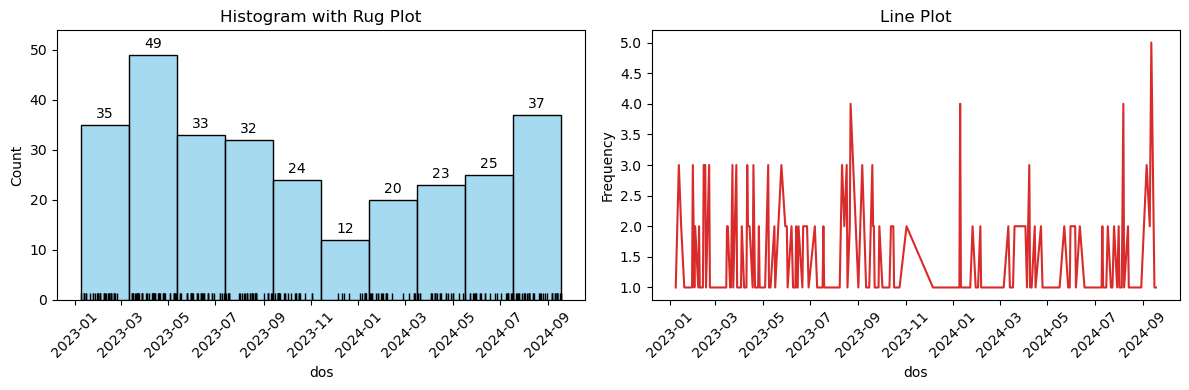

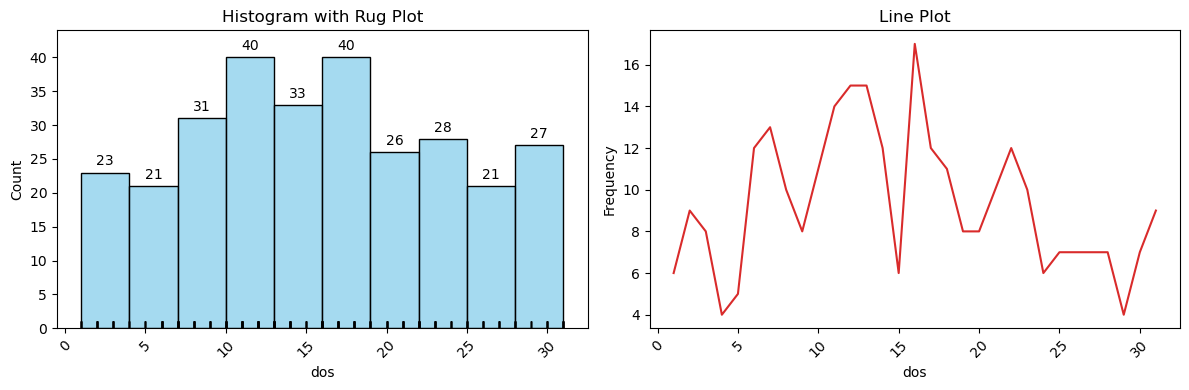

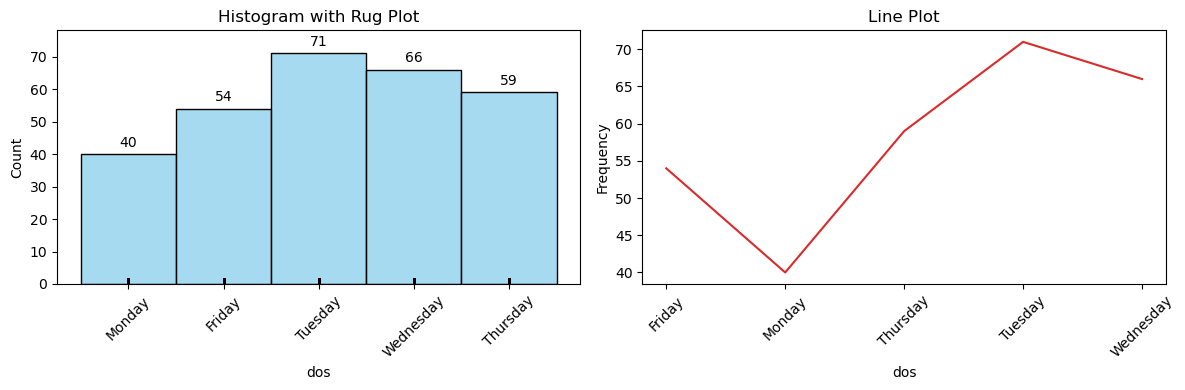

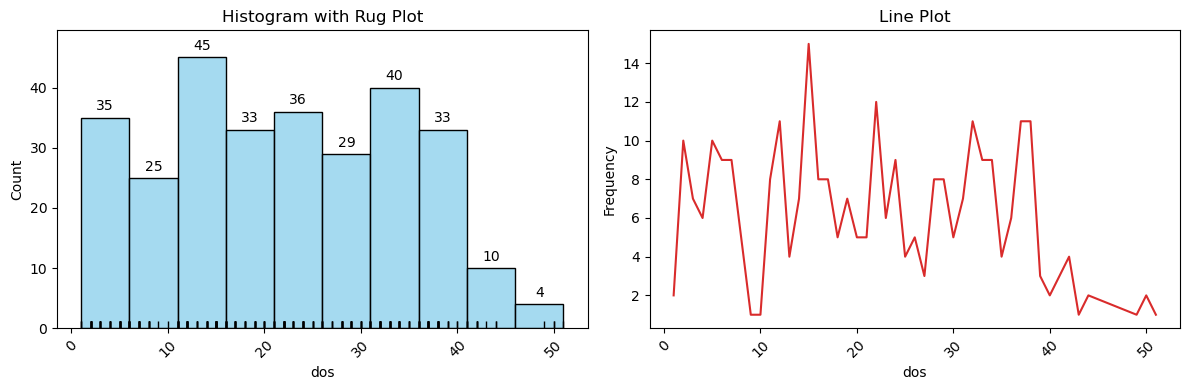

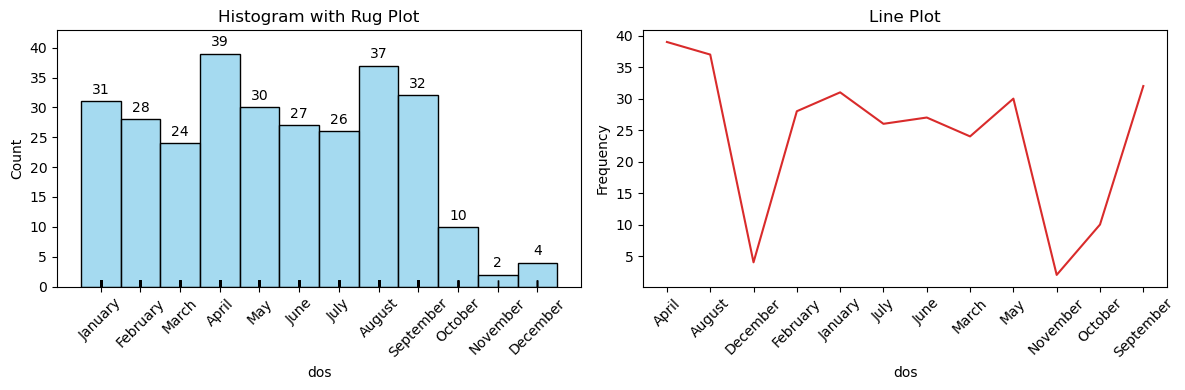

In [20]:
plots=[None,"dt.day","dt.day_name()","dt.isocalendar().week","dt.month_name()"]
for plot in plots: # Changed iteration variable to plot
    vizpro.dt_univariate_plot(df,"dos",parm=plot)

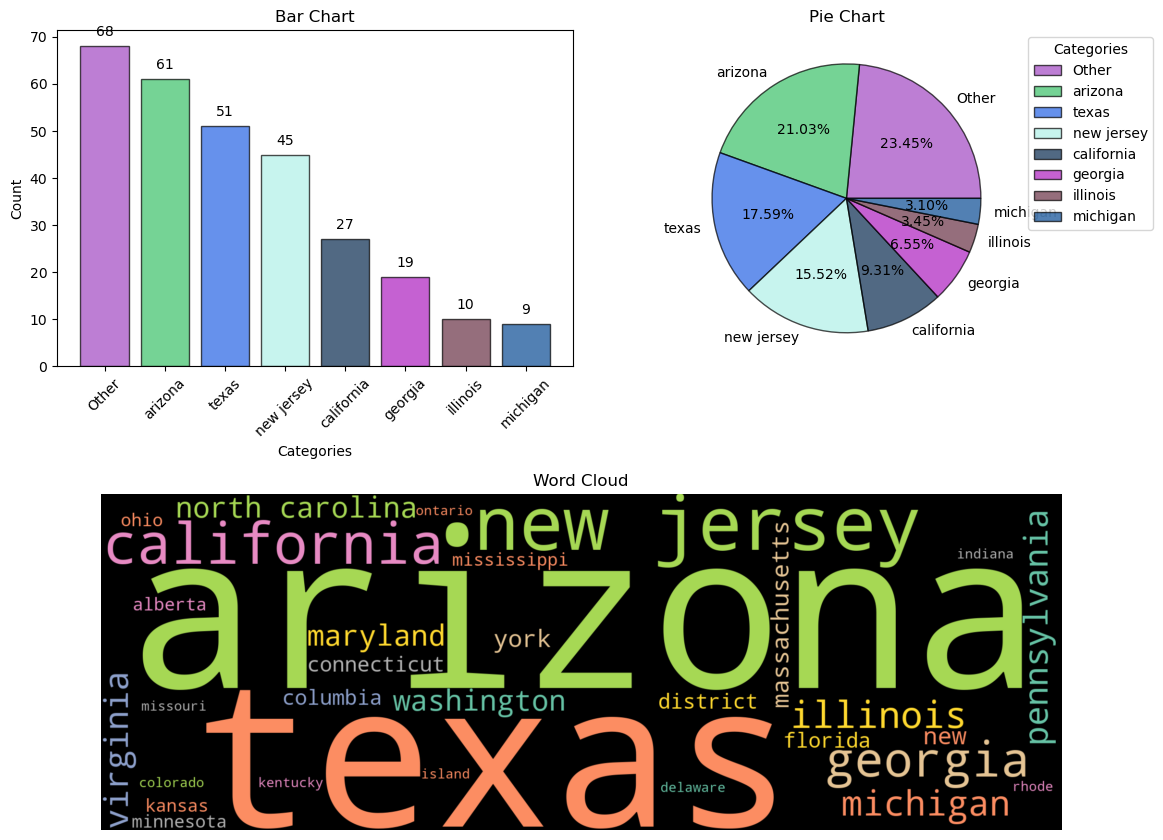

In [36]:
vizpro.cat_univar_plots(df, "state", k=8)


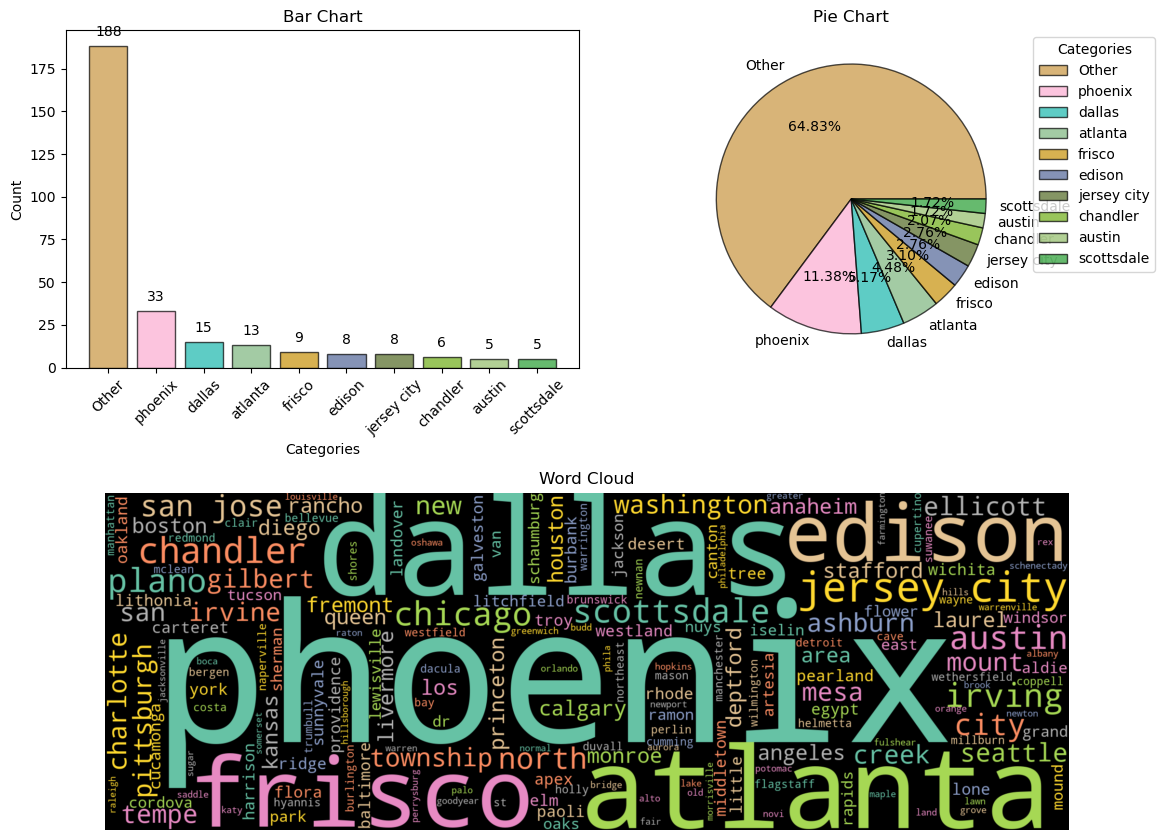

In [52]:
vizpro.cat_univar_plots(df, "location", k=10)


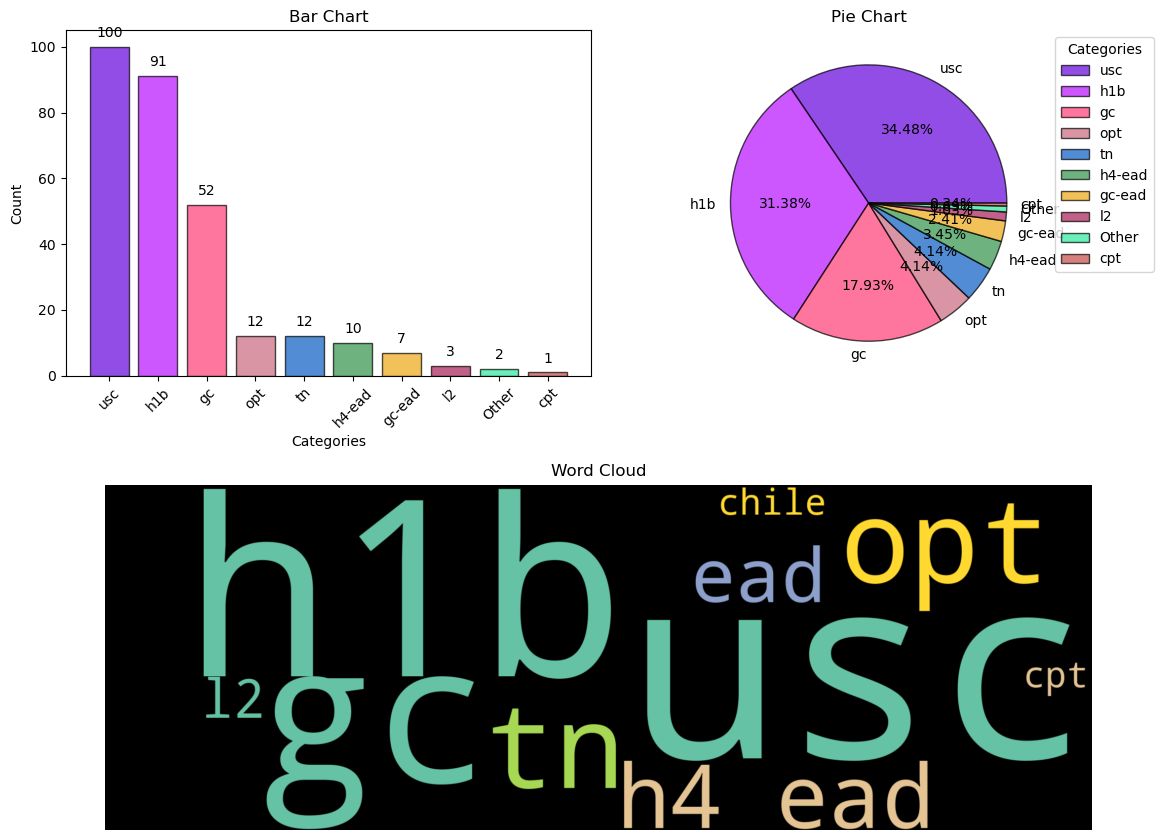

In [56]:
vizpro.cat_univar_plots(df, "visa", k=10)


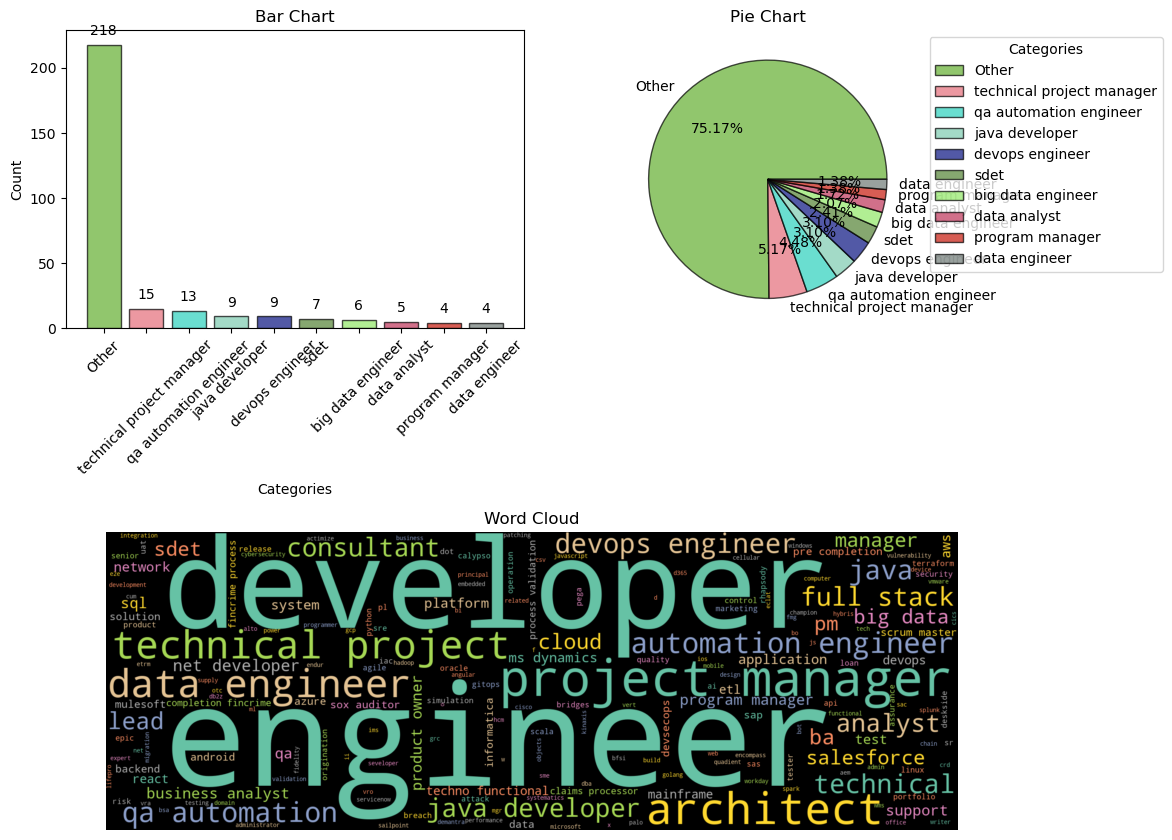

In [50]:
vizpro.cat_univar_plots(df, "title", k=10)


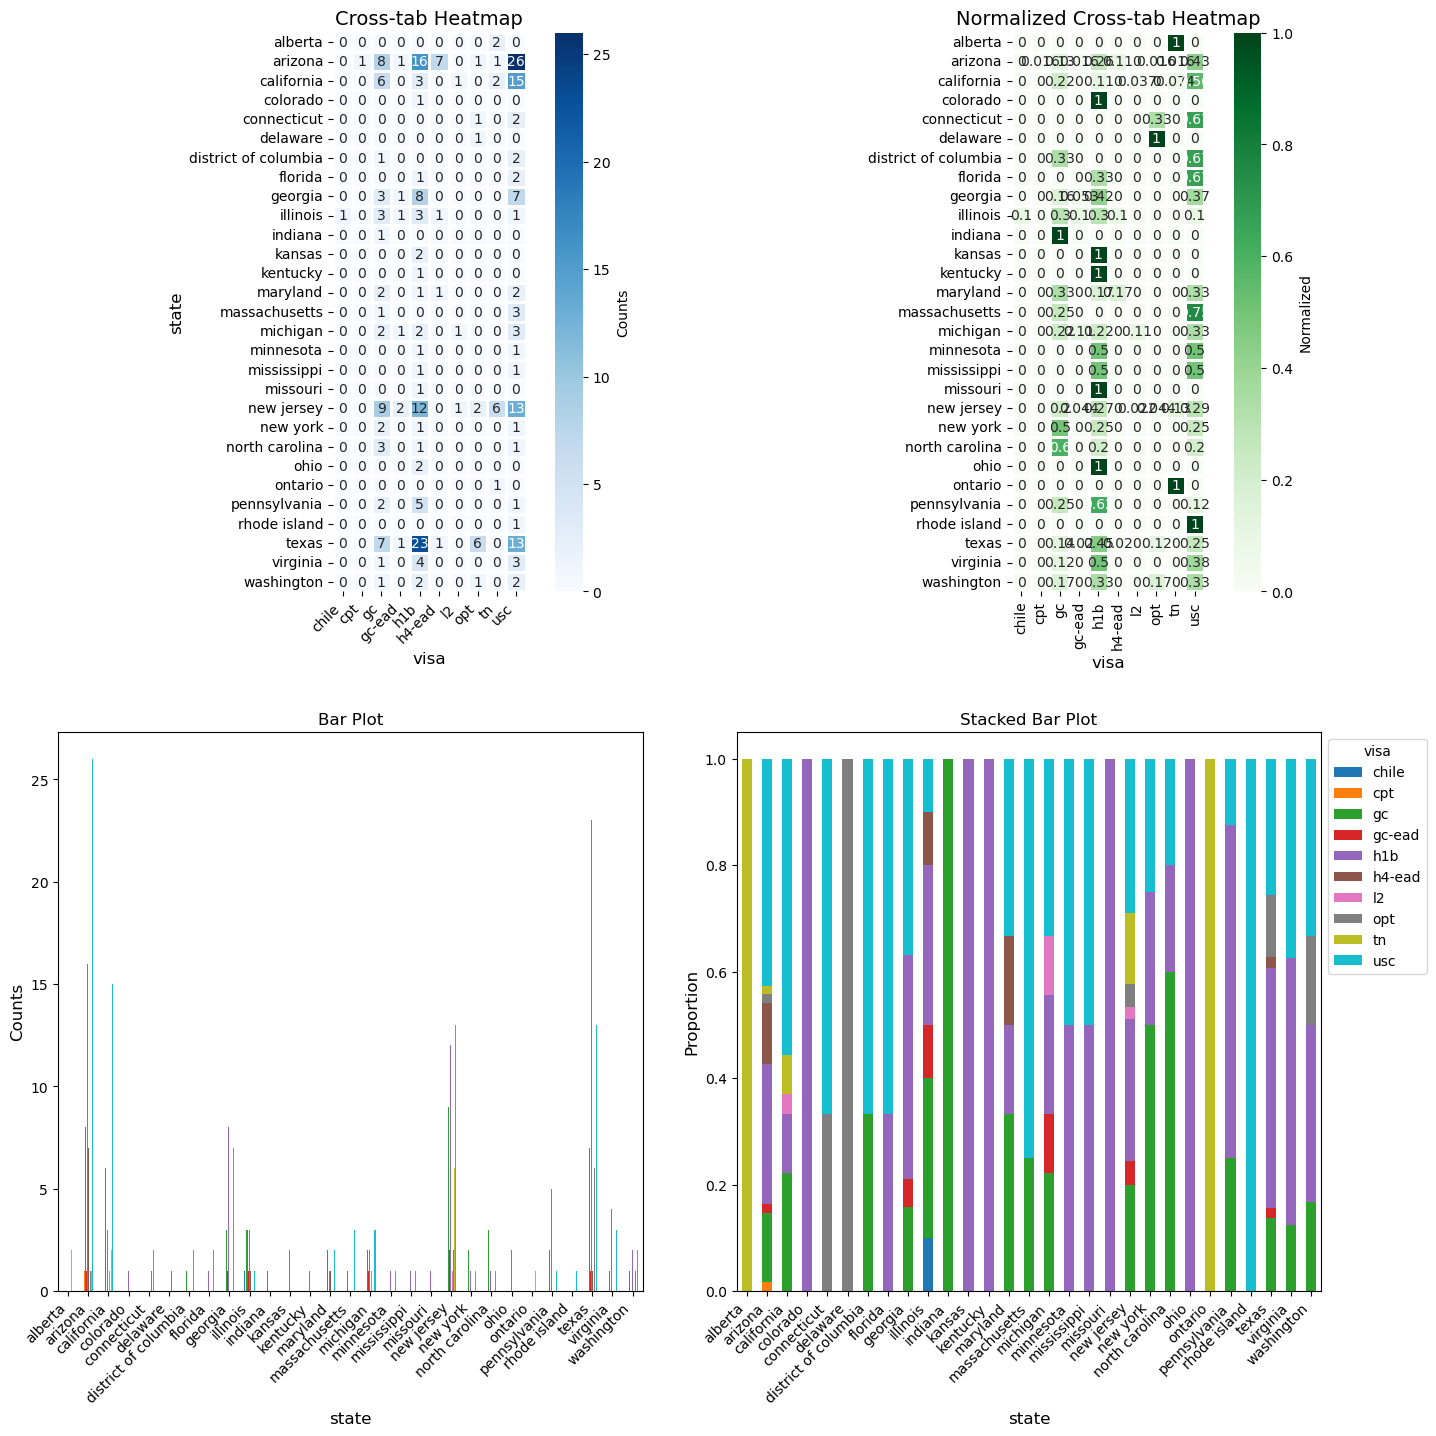

In [62]:
vizpro.plot_cat_bivariate(df, "state", "visa", xlabel_rotation=45)


In [54]:
df

,name,contact_no,email_id,title,visa,location,state,linkedin,dos
0,santhosh kumar thiagarajan,7174342466,santoszh@gmail.com,technical project manager,h1b,paoli,pennsylvania,https://www.linkedin.com/in/santoszh,2023-01-09
1,blaise sama,4696615921,blaise.jayin@gmail.com,platform engineer,usc,dallas,texas,https://www.linkedin.com/in/blaise-sama/,2023-01-13
2,sanjay kumar kalal,8322785209,kalalsanjay001@gmail.com,sas programmer,h1b,frisco,texas,https://www.linkedin.com/in/sanjay-kalal-50678...,2023-01-13
3,sanjay kumar hadavala,2672344630,shadba@gmail.com,portfolio manager,usc,ashburn,virginia,https://www.linkedin.com/in/sanjay-hadavala-44...,2023-01-13
4,mitali shashikant shinde,4087979481,mitali.shinde03@gmail.com,portfolio manager,h1b,ashburn,virginia,https://www.linkedin.com/in/mitali-s/details/e...,2023-01-16
...,...,...,...,...,...,...,...,...,...
285,rajyalakshmi nukala,2165072544,nukalarajyam@gmail.com,servicenow developer,h1b,houston,texas,NaN,2024-09-12
286,jagjeet singh chandhok,8475058593,jsc.embeddeddev@gmail.com,embedded engineer,h1b,dallas,texas,https://www.linkedin.com/in/jagjeet-singh-chan...,2024-09-12
287,tanuj goyal,2014920550,tanujgoyal22@gmail.com,java engineer,h4-ead,phoenix,arizona,https://www.linkedin.com/in/tanuj-goyal-03804716/,2024-09-16
288,sumeet narang,4146889587,sumeet.narang1969@gmail.com,salesforce marketing cloud consultant,h1b,warrenville,illinois,https://www.linkedin.com/in/sumeet-narang-265b...,2024-09-17


In [98]:
vizpro.hyp_cat_cat(df, "state", "visa")

- Cramérs V            : 0.3222
- Significance Level   : 5.00%
- Null Hypothesis      : The variables are independent
- Alternate Hypothesis : The variables are dependent
- Chi-square Statistic : 269.9350
- p-value              : 0.2089

Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis.
The variables state and visa are likely independent.


In [100]:
vizpro.hyp_cat_cat(df, "state", "location")

- Cramérs V            : 0.9996
- Significance Level   : 5.00%
- Null Hypothesis      : The variables are independent
- Alternate Hypothesis : The variables are dependent
- Chi-square Statistic : 8113.9346
- p-value              : 0.0000

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
The variables state and location are likely associated.
